In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint
from skopt import BayesSearchCV
from skopt.space import Integer
from sklearn.metrics import accuracy_score

In [10]:
import pickle

# Abre o arquivo .pkl usando pickle
with open('Titanic.pkl', 'rb') as f:
    data = pickle.load(f)

# Verifica a estrutura dos dados carregados
print("Tipo de dados carregados:", type(data))
print("Conteúdo dos dados:", data)

# Se for uma lista, acesse os elementos por índice
if isinstance(data, list):
    X_treino = data[0]
    X_teste = data[1]
    y_treino = data[2]
    y_teste = data[3]
    feature_names = data[4] if len(data) > 4 else None  # Verifica se feature_names existe
else:
    raise TypeError("O arquivo .pkl não contém uma lista. Verifique a estrutura dos dados.")

# Verifica os dados carregados
print("X_treino:", X_treino)
print("X_teste:", X_teste)
print("y_treino:", y_treino)
print("y_teste:", y_teste)
print("Feature Names:", feature_names)

Tipo de dados carregados: <class 'list'>
Conteúdo dos dados: [     Pclass  Sex   Age  SibSp  Parch      Fare
331       1    1  45.5      0      0   28.5000
733       2    1  23.0      0      0   13.0000
382       3    1  32.0      0      0    7.9250
704       3    1  26.0      1      0    7.8542
813       3    0   6.0      4      2   31.2750
..      ...  ...   ...    ...    ...       ...
106       3    0  21.0      0      0    7.6500
270       1    1  30.0      0      0   31.0000
860       3    1  41.0      2      0   14.1083
435       1    0  14.0      1      2  120.0000
102       1    1  21.0      0      1   77.2875

[712 rows x 6 columns],      Pclass  Sex   Age  SibSp  Parch     Fare
709       3    1  30.0      1      1  15.2458
439       2    1  31.0      0      0  10.5000
840       3    1  20.0      0      0   7.9250
720       2    0   6.0      0      1  33.0000
39        3    0  14.0      1      0  11.2417
..      ...  ...   ...    ...    ...      ...
433       3    1  17.0     

In [11]:
modelo = DecisionTreeClassifier(criterion='gini')

In [12]:
param_grid = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_dist = {
    'criterion':  ['gini', 'entropy'],
    'max_depth': randint(1, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
}


param_bayes = {
    'criterion':  ['gini', 'entropy'],
    'max_depth': Integer(1, 50),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 10),
}

In [13]:
def plot_decision_tree(model, feature_names, class_names, title):
    plt.figure(figsize=(30, 15))
    plot_tree(model, filled=True, feature_names=feature_names, class_names=class_names, rounded=True, fontsize=10)
    plt.title(title)
    plt.show()


In [14]:
grid_search = GridSearchCV( DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_treino, y_treino)
print("Melhores parâmetros encontrados com GridSearchCV:")
print(grid_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(grid_search.best_score_))

Melhores parâmetros encontrados com GridSearchCV:
{'criterion': 'entropy', 'max_depth': 6, 'max_features': 0.6, 'min_samples_leaf': 1, 'min_samples_split': 10}
Melhor pontuação de validação cruzada: 0.83


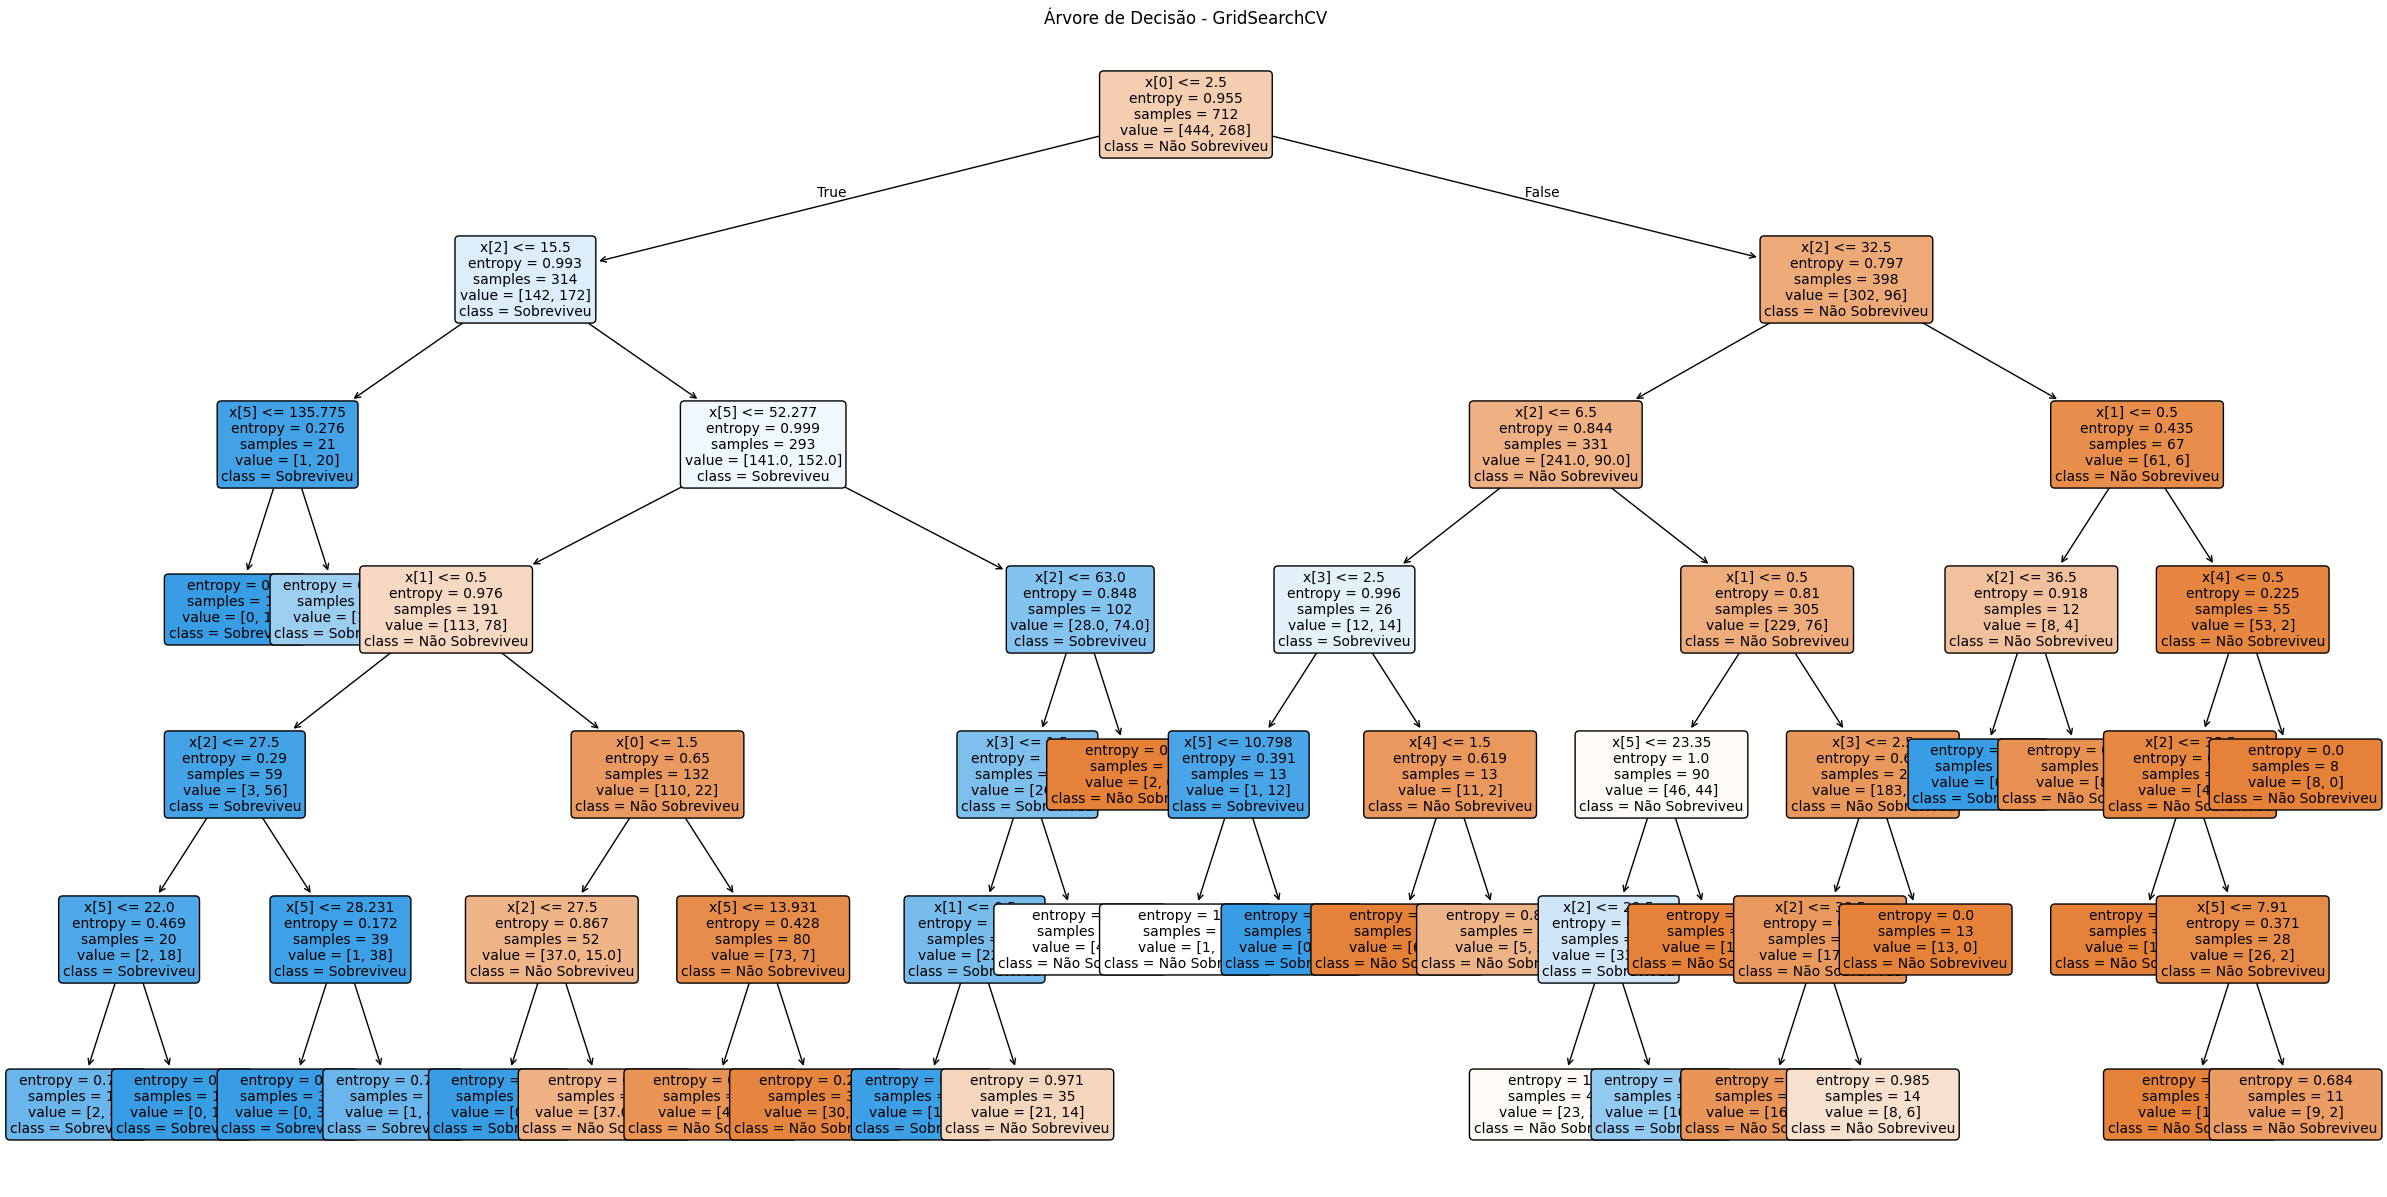

In [15]:
best_model_grid = grid_search.best_estimator_
plot_decision_tree(best_model_grid, feature_names, ['Não Sobreviveu', 'Sobreviveu'], "Árvore de Decisão - GridSearchCV")

In [16]:
random_search = RandomizedSearchCV(DecisionTreeClassifier(), param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_treino, y_treino)
print("\nMelhores parâmetros encontrados com RandomizedSearchCV:")
print(random_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(random_search.best_score_))


Melhores parâmetros encontrados com RandomizedSearchCV:
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 8}
Melhor pontuação de validação cruzada: 0.82


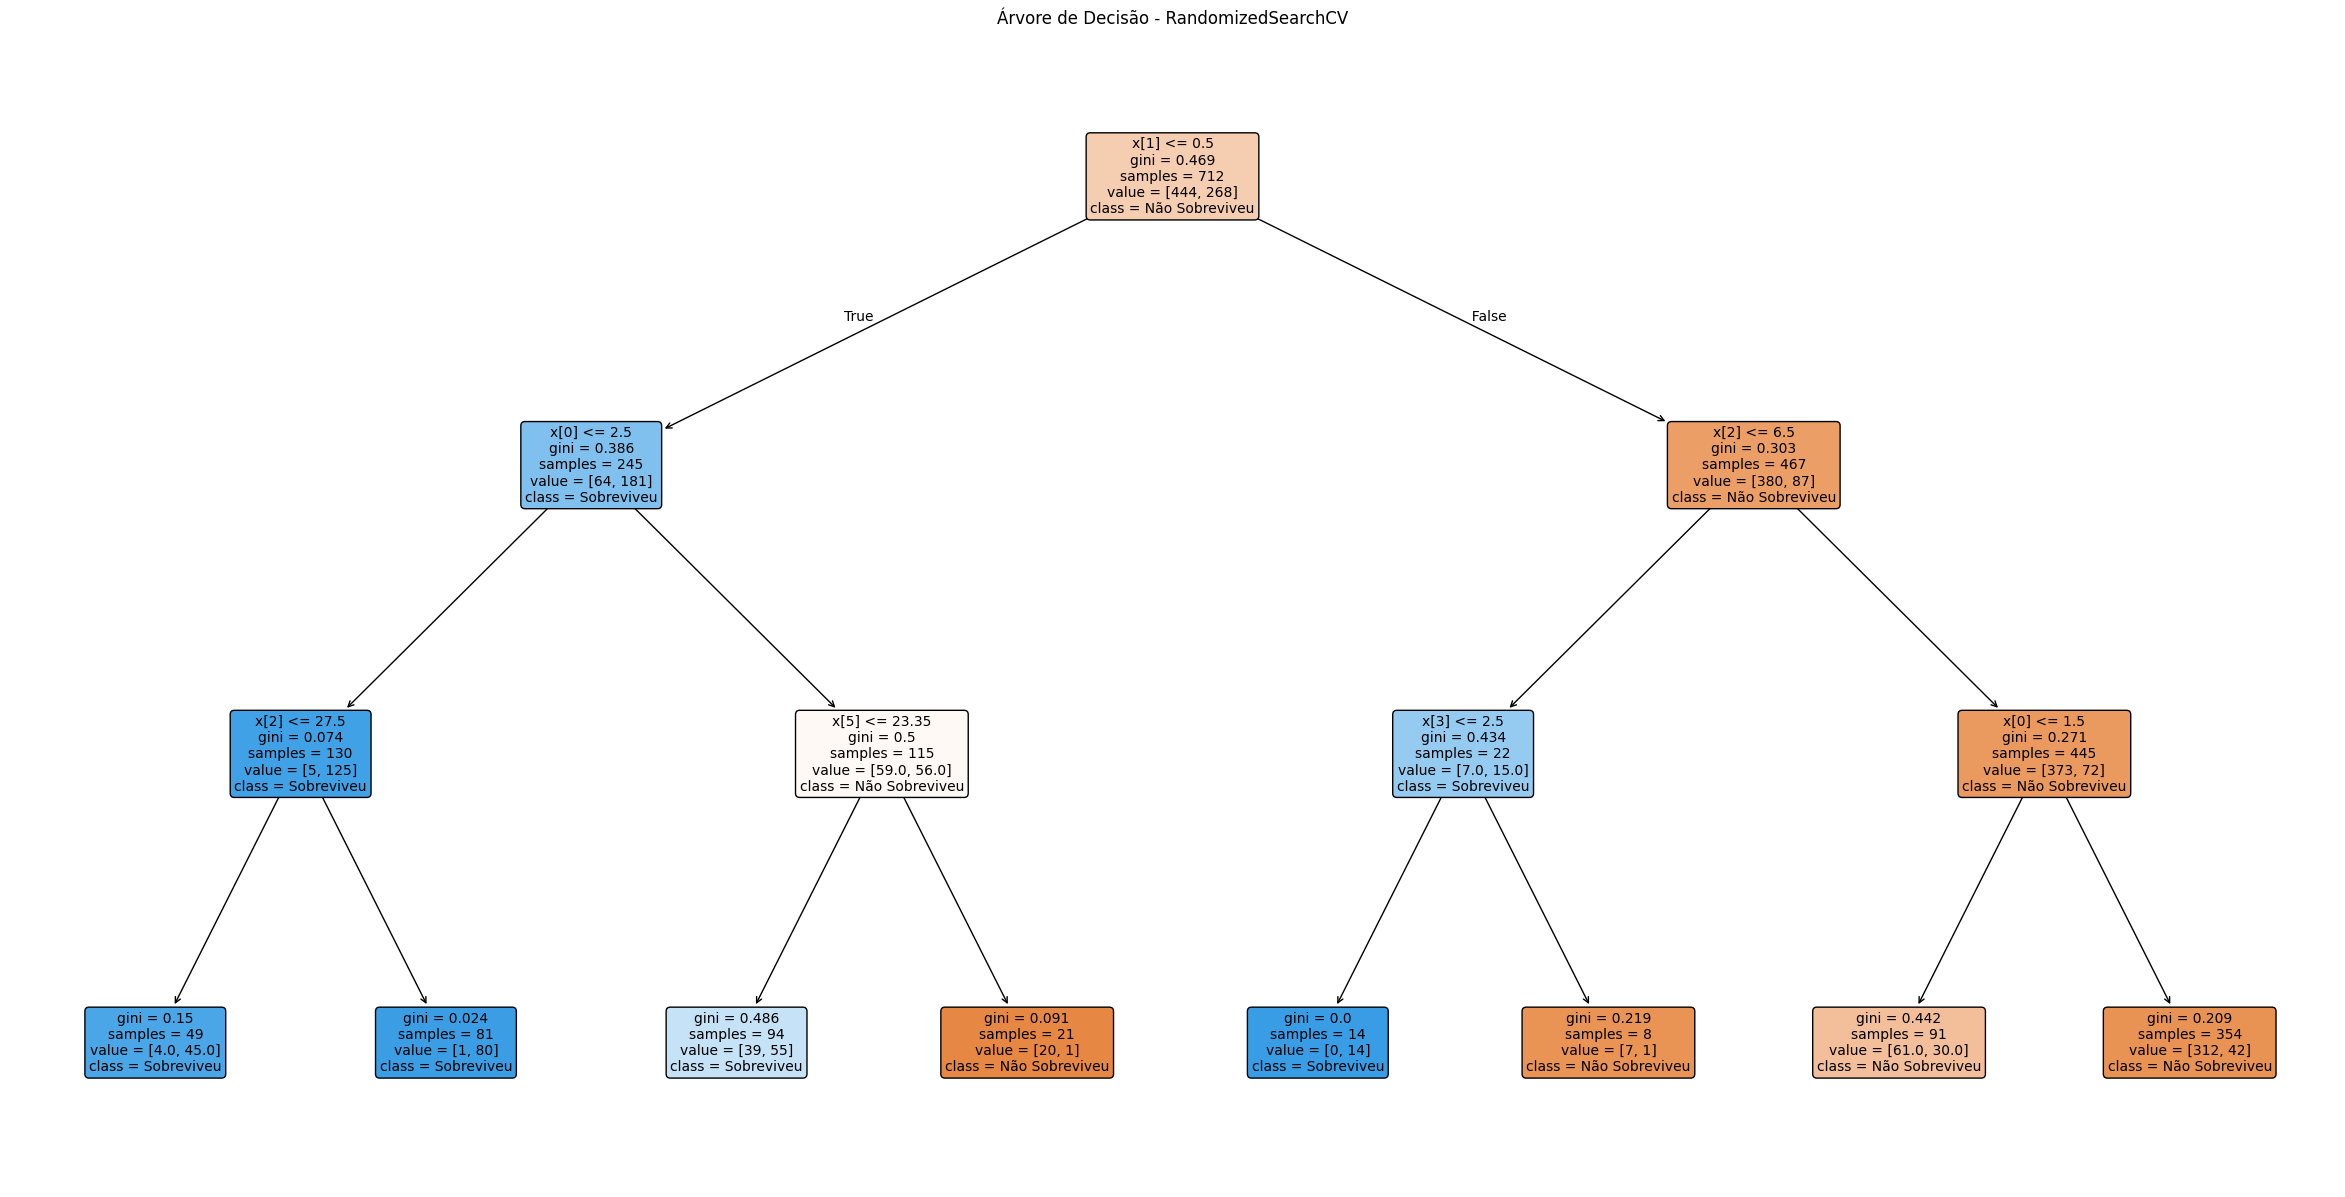

In [17]:
best_model_random = random_search.best_estimator_
plot_decision_tree(best_model_random, feature_names, ['Não Sobreviveu', 'Sobreviveu'], "Árvore de Decisão - RandomizedSearchCV")

In [18]:
bayes_search = BayesSearchCV(DecisionTreeClassifier(), param_bayes, n_iter=50, cv=5, scoring='accuracy', random_state=42)
bayes_search.fit(X_treino, y_treino)
print("\nMelhores parâmetros encontrados com BayesSearchCV:")
print(bayes_search.best_params_)
print("Melhor pontuação de validação cruzada: {:.2f}".format(bayes_search.best_score_))


Melhores parâmetros encontrados com BayesSearchCV:
OrderedDict({'criterion': 'gini', 'max_depth': 42, 'min_samples_leaf': 10, 'min_samples_split': 19})
Melhor pontuação de validação cruzada: 0.81


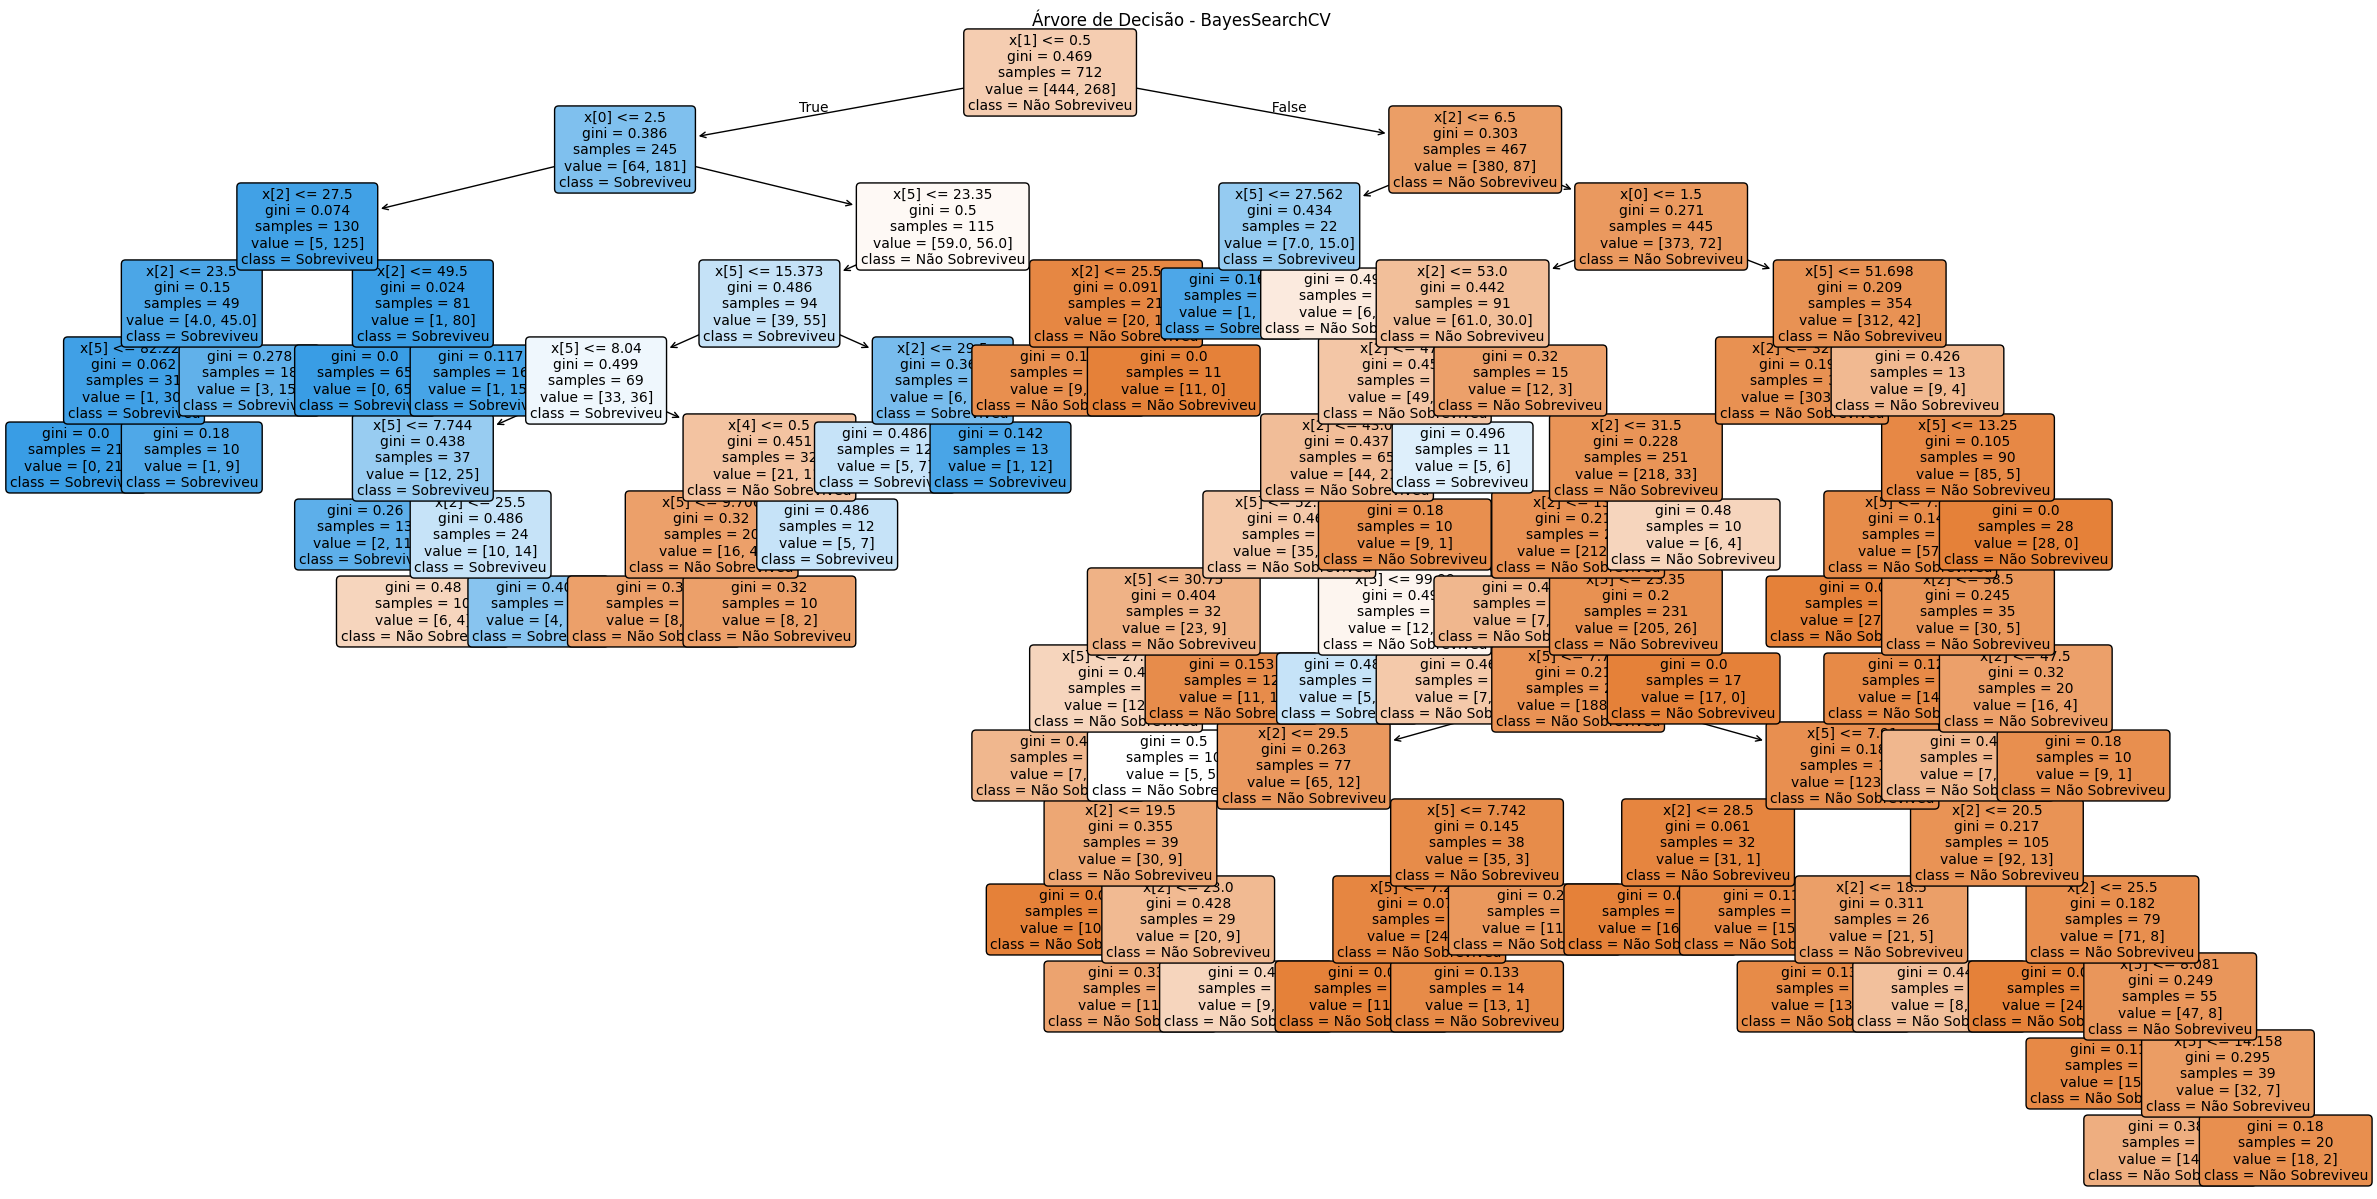

In [19]:
best_model_bayes = bayes_search.best_estimator_
plot_decision_tree(best_model_bayes, feature_names, ['Não Sobreviveu', 'Sobreviveu'], "Árvore de Decisão - BayesSearchCV")

In [20]:
previsoes_grid = best_model_grid.predict(X_teste)
accuracy_grid = accuracy_score(y_teste, previsoes_grid)
print("\nAcurácia do melhor modelo (GridSearchCV) no conjunto de teste: {:.2f}".format(accuracy_grid))


Acurácia do melhor modelo (GridSearchCV) no conjunto de teste: 0.79


In [21]:
previsoes_random = best_model_random.predict(X_teste)
accuracy_random = accuracy_score(y_teste, previsoes_random)
print("Acurácia do melhor modelo (RandomizedSearchCV) no conjunto de teste: {:.2f}".format(accuracy_random))

Acurácia do melhor modelo (RandomizedSearchCV) no conjunto de teste: 0.80


In [22]:
previsoes_bayes = best_model_bayes.predict(X_teste)
accuracy_bayes = accuracy_score(y_teste, previsoes_bayes)
print("Acurácia do melhor modelo (BayesSearchCV) no conjunto de teste: {:.2f}".format(accuracy_bayes))

Acurácia do melhor modelo (BayesSearchCV) no conjunto de teste: 0.77
